# 1

In [1]:
from PIL import Image

sample_image_fn = "A-Cat.jpg"
#sample_image_fn = "yamahaR1.png"

# Open an image file
image = Image.open(sample_image_fn)

# Understanding Image Properties
# Dimensions: Get the width and height of the image
width, height = image.size

# Mode: Get the color mode of the image (e.g., "RGB", "L", "RGBA")
color_mode = image.mode

# Format: Get the file format of the image (e.g., "JPEG", "PNG", "BMP")
file_format = image.format

# Metadata: Get metadata associated with the image (e.g., EXIF data)
metadata = image.info

# Accessing Image Properties
print("Image Dimensions:", (width, height))
print("Color Mode:", color_mode)
print("File Format:", file_format)
print("Metadata:", metadata)

# Close the image object
image.close()


Image Dimensions: (249, 148)
Color Mode: RGB
File Format: JPEG
Metadata: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


a) Function to isolate the blue channel

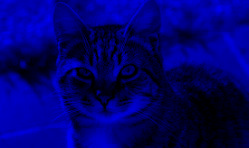

In [2]:

def just_blue(image):
    # Split the image into its individual channels
    red_channel, green_channel, blue_channel = image.split()
    
    # Create a new image with only the blue channel
    blue_image = Image.merge("RGB", (red_channel.point(lambda _: 0), green_channel.point(lambda _: 0), blue_channel))
    
    return blue_image


# Open an image file
input_image = Image.open("A-Cat.jpg")

# Call the function with the input image
output_image_blue = just_blue(input_image)

output_image_blue.show()

#display altered image
display(output_image_blue)

#Save the image to a .png file
output_image_blue.save("blue_channel.png")

input_image.close()
output_image_blue.close()


b) Fuction to convert image to a grey scale

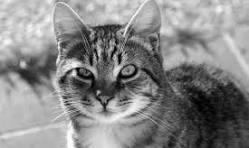

In [3]:
def grey_scale(image):
    # Convert the image to grayscale
    grey_image = image.convert("L")
    return grey_image



# Open an image file
input_image = Image.open("A-Cat.jpg")

# Call the function with the input image
output_image_grey = grey_scale(input_image)

output_image_grey.show()

#display altered image
display(output_image_grey)

#Save the image to a .png file
output_image_grey.save("grey_scale.png")

input_image.close()
output_image_grey.close()

c) Function that returns a new grey scale version of the input image that is based on a user defined set of weights

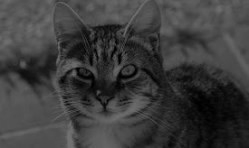

In [4]:
#Function to convert image to weighted grayscale
def weighted_grey_scale(image, red_weight, green_weight, blue_weight):
    # Split the image into its individual channels
    red_channel, green_channel, blue_channel = image.split()

    # Create weighted versions of each channel
    weighted_red_channel = red_channel.point(lambda x: x * red_weight)
    weighted_green_channel = green_channel.point(lambda x: x * green_weight)
    weighted_blue_channel = blue_channel.point(lambda x: x * blue_weight)

    # Merge the weighted channels into a single image
    weighted_sum = Image.merge("RGB", (weighted_red_channel, weighted_green_channel, weighted_blue_channel))

    # Convert the weighted sum to grayscale
    weighted_grey_image = weighted_sum.convert("L")

    return weighted_grey_image


# Open an image file
input_image = Image.open("A-Cat.jpg")


# Assign weights- Switch between the assigned weights as you please to get the user-defined weighted gray scale.
#In the order red,green, blue
output_image_weighted_grey = weighted_grey_scale(input_image, 0.2989, 0.5870, 0.1140)

# Display the altered images
display(output_image_weighted_grey)


#Save the image to a .png file
output_image_weighted_grey.save("weighted_grey_scale.png")


input_image.close()
output_image_weighted_grey.close()

d) Function that returns an altered version of the input image such that the right hand side is a reflection of the left hand side.

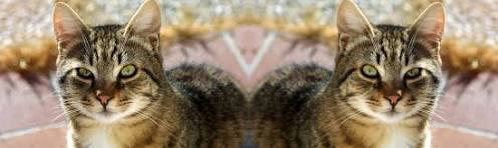

In [5]:

def mirror_image(image):
    width, height = image.size
    mirrored_image = Image.new("RGB", (width * 2, height))  # Create a new image with double width
    
    # Paste the original image on the left side
    mirrored_image.paste(image, (0, 0))
    
    # Iterate over each pixel column in the left half of the image
    for y in range(height):
        for x in range(width):
            # Get the corresponding pixel from the left side of the image
            pixel = image.getpixel((width - x - 1, y))
            # Set the pixel value in the mirrored image on the right side
            mirrored_image.putpixel((width + x, y), pixel)
    
    return mirrored_image


input_image = Image.open("A-Cat.jpg")
output_image_mirror = mirror_image(input_image)
output_image_mirror.show()  # Display the mirrored image
display(output_image_mirror)

#Save the image to a .png file
output_image_mirror.save("mirror.png")

input_image.close()
output_image_mirror.close()


e) - Function that returns symmettry score

In [6]:
from PIL import Image, ImageChops

def measure_symmetry(face_image):
    """
    Function to measure the symmetry of a person's face.
    
    Args:
    - face_image: PIL Image object representing the person's face
    
    Returns:
    - symmetry_score: Float representing the symmetry score of the face (0 to 1)
    """
    # Create a mirrored version of the face
    mirrored_face = mirror_image(face_image)
    
    # Calculate the symmetry score based on pixel-wise comparison
    diff = ImageChops.difference(face_image, mirrored_face)
    diff_data = diff.getdata()
    total_diff = sum(abs(sum(pixel)) for pixel in diff_data)
    symmetry_score = 1 - (total_diff / (255 * face_image.size[0] * face_image.size[1] * 3))
    
    return symmetry_score

# Example usage:
input_face = Image.open("face.jpg")
symmetry_score = measure_symmetry(input_face)
print("Symmetry score:", symmetry_score)

Symmetry score: 1.0


f) - Detailed explanation

### To dispaly an altered image, use display(altered_image) not display(altered_image.show()).

The show() method of an image in PIL is primarily intended for displaying the image using the default image viewer associated with your operating system. It doesn't return any value, which is why output_image ends up being None.

In your code, you're assigning the result of resized_image.show() to output_image, and since show() doesn't return anything, output_image becomes None.

#### Just_Blue
The provided code snippet defines a function just_blue that extracts the blue channel from an input image, resulting in an image containing only the blue channel information.


Function just_blue:
This function takes an input image as an argument.
It splits the input image into its individual red, green, and blue channels using the split() method.
Then, it creates a new image by merging only the blue channel information and setting the red and green channels to zero.
Finally, it returns the new image containing only the blue channel.

Image Processing:
The code demonstrates basic image processing techniques, such as splitting channels and merging them to create new images.
It showcases how to extract specific color information from an image, in this case, the blue channel.

Applications:
This code can be useful in various image processing tasks where isolating specific color information is necessary.
It can be applied in computer vision applications, such as object detection or image segmentation, where identifying objects based on color plays a crucial role.

Limitations:
The code assumes that the input image is in the RGB color space. If the input image is in a different color space, such as grayscale or CMYK, additional processing may be required.
It sets the red and green channels to zero, which may result in loss of information if the original image contains important details in those channels.

#### Grey and weighted gray scale


First convert the input image to grayscale using the convert("L") method.
Then, we split the grayscale image into its individual red, green, and blue channels.

For the weighted_grey_scale  function, it converts an input image to grayscale based on user-defined weights for each color channel.

Code Explanation:
Function weighted_grey_scale:
This function takes an input image and user-defined weights for the red, green, and blue channels.
It splits the input image into its individual red, green, and blue channels.
Then, it applies the user-defined weights to each channel separately to create weighted versions of each channel.
Next, it merges the weighted channels into a single RGB image.
Finally, it converts the weighted sum image to grayscale using the convert() method.


Applications:
This code can be applied in various image processing tasks where customized grayscale conversion is required.
It allows users to adjust the emphasis of different color components in the grayscale image based on specific application requirements.


Limitations:
The code assumes that the input image is in the RGB color space. If the input image is in a different color space, additional processing may be required to handle conversions.
The user-defined weights may not always result in visually optimal grayscale images, depending on the characteristics of the input images and the desired output.

#### Mirror

The provided code defines a function mirror_image that mirrors an input image horizontally, creating a new image with the original image on the left side and its mirrored version on the right side. Let's analyze and discuss the code, along with its applications and potential improvements:

Code Explanation:
Function mirror_image:
This function takes an input image and mirrors it horizontally to create a new image with double width.
It initializes a new image with the dimensions twice that of the input image.
Then, it pastes the original input image onto the left side of the new image.
It iterates over each pixel column in the left half of the image, retrieves the corresponding pixel from the left side of the input image, and sets the pixel value in the mirrored image on the right side.
Finally, it returns the mirrored image.



Applications:
This code can be used in various image processing tasks where horizontal mirroring of images is required.
It can be applied in creating symmetrical images, such as in artistic compositions or in generating training data for machine learning models.


Limitations:
The code assumes that the input image is in the RGB color space. If the input image is in a different color space, additional processing may be required to handle conversions.
It only mirrors the image horizontally. For tasks requiring vertical mirroring or more complex transformations, additional code modifications would be necessary.

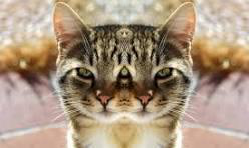

In [7]:
def mirror_image_left_to_right(image):
    width, height = image.size
    mirrored_image = image.copy()  # Create a copy of the original image
    
    # Iterate over each pixel column in the right half of the image
    for x in range(width // 2, width):
        # Iterate over each pixel row in the image
        for y in range(height):
            # Get the corresponding pixel from the left half of the image
            mirrored_pixel = image.getpixel((width - x - 1, y))
            # Set the pixel value in the mirrored image on the right side
            mirrored_image.putpixel((x, y), mirrored_pixel)
    
    return mirrored_image

# Open an image file
input_image = Image.open("A-Cat.jpg")

# Call the function with the input image
output_image = mirror_image_left_to_right(input_image)

# Display the altered image
display(output_image)



In [8]:
from PIL import Image, ImageChops

def measure_symmetry(face_image):
    """
    Function to measure the symmetry of a person's face.
    
    Args:
    - face_image: PIL Image object representing the person's face
    
    Returns:
    - symmetry_score: Float representing the symmetry score of the face (0 to 1)
    """
    # Create a mirrored version of the face
    #mirrored_face = mirror_image(face_image)
    mirrored_face = mirror_image_left_to_right(face_image)
    
    # Calculate the symmetry score based on pixel-wise comparison
    diff = ImageChops.difference(face_image, mirrored_face)
    diff_data = diff.getdata()
    total_diff = sum(abs(sum(pixel)) for pixel in diff_data)
    symmetry_score = 1 - (total_diff / (255 * face_image.size[0] * face_image.size[1] * 3))
    
    return symmetry_score

# Example usage:
input_face = Image.open("face.jpg")
symmetry_score = measure_symmetry(input_face)
print("Symmetry score:", symmetry_score)

Symmetry score: 0.9818874147981653


With the mirror image function, I created two different mirror functions; mirror_image() and  mirror_image_left_to_right(). 


Then I used them in the symmetry function, the mirror_image() function generated a value of symmetry of 1 when I checked the symettry while mirror_image_left_to_right() generated a value of 0.98. This led me to the conclusion that a completely mirrored image should have symmetry of 1.

# 2

a)

In [9]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

    return arr

#Sample list to sort
my_list = [64, 25, 12, 22, 11]


# Call merge sort
sorted_list_merge = merge_sort(my_list.copy())
print("Merge Sort:", sorted_list_merge)

Merge Sort: [11, 12, 22, 25, 64]


In [10]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr

    pivot = arr[-1]
    left = [x for x in arr[:-1] if x <= pivot]
    right = [x for x in arr[:-1] if x > pivot]

    return quick_sort(left) + [pivot] + quick_sort(right)

#Sample list to sort
my_list = [64, 25, 12, 22, 11]


# Call quick sort
sorted_list_quick = quick_sort(my_list.copy())
print("Quick Sort:", sorted_list_quick)


Quick Sort: [11, 12, 22, 25, 64]


In [11]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

#Sample list to sort
my_list = [64, 25, 12, 22, 11]


# Call bubble sort
sorted_list_bubble = bubble_sort(my_list.copy())
print("Bubble Sort:", sorted_list_bubble)

Bubble Sort: [11, 12, 22, 25, 64]


b) & c)

In [13]:
import time
import psutil
import numpy as np
import sys

def sort_timing(arr):
    start_time = time.time()
    merge_sort(arr.copy())
    t_merge = time.time() - start_time

    start_time = time.time()
    quick_sort(arr.copy())
    t_quick = time.time() - start_time

    start_time = time.time()
    bubble_sort(arr.copy())
    t_bubble = time.time() - start_time

    return t_merge, t_quick, t_bubble

def sort_space_complexity(arr):
    # Memory usage for merge sort
    process = psutil.Process()
    mem_before_merge = process.memory_info().rss
    merge_sort(arr.copy())
    mem_after_merge = process.memory_info().rss
    s_merge = mem_after_merge - mem_before_merge

    # Memory usage for quick sort
    process = psutil.Process()
    mem_before_quick = process.memory_info().rss
    quick_sort(arr.copy())
    mem_after_quick = process.memory_info().rss
    s_quick = mem_after_quick - mem_before_quick

    # Memory usage for bubble sort
    process = psutil.Process()
    mem_before_bubble = process.memory_info().rss
    bubble_sort(arr.copy())
    mem_after_bubble = process.memory_info().rss
    s_bubble = mem_after_bubble - mem_before_bubble

    return s_merge, s_quick, s_bubble

# Test the time complexity and space complexity analysis
input_sizes = [1000, 5000, 10000]  # Input sizes for testing
results_time = []
results_space = []

for size in input_sizes:
    arr = np.random.rand(size)  
    t_merge, t_quick, t_bubble = sort_timing(arr)
    s_merge, s_quick, s_bubble = sort_space_complexity(arr)
    results_time.append((t_merge, t_quick, t_bubble))
    results_space.append((s_merge, s_quick, s_bubble))

# Print the results
print("Time Complexity Analysis:")
print("Input Size\tMerge Sort\tQuick Sort\tBubble Sort")
for i, size in enumerate(input_sizes):
    t_merge, t_quick, t_bubble = results_time[i]
    print(f"{size}\t\t{t_merge:.6f}\t{t_quick:.6f}\t{t_bubble:.6f}")

print("\nSpace Complexity Analysis:")
print("Input Size\tMerge Sort\tQuick Sort\tBubble Sort")
for i, size in enumerate(input_sizes):
    s_merge, s_quick, s_bubble = results_space[i]
    print(f"{size}\t\t{s_merge}\t{s_quick}\t{s_bubble}")

Time Complexity Analysis:
Input Size	Merge Sort	Quick Sort	Bubble Sort
1000		0.008878	0.003607	0.321467
5000		0.046875	0.015625	5.724642
10000		0.093709	0.031295	26.630468

Space Complexity Analysis:
Input Size	Merge Sort	Quick Sort	Bubble Sort
1000		0	0	0
5000		0	86016	0
10000		0	40960	0


d)

#### Understanding sorting algorithms

#### Merge Sort: is a popular sorting algorithm that follows the divide-and-conquer paradigm. It works by dividing the unsorted list into smaller sublists, sorting each sublist recursively, and then merging the sorted sublists to produce the final sorted list.

Here's how Merge Sort works:

Divide: The unsorted list is divided into two halves recursively until each sublist contains only one element.

Conquer: Each sublist is sorted individually using Merge Sort.

Merge: The sorted sublists are merged together to produce a single sorted list. This merging process involves comparing elements from the two sublists and adding them to the final sorted list in ascending order.
The key operation in Merge Sort is the merging step, which efficiently combines two sorted lists into a single sorted list. This step takes advantage of the fact that both input lists are already sorted, allowing for a straightforward merging process.

Merge Sort has a time complexity of O(n log n), making it an efficient sorting algorithm for large datasets. It is stable, meaning it preserves the relative order of equal elements, and it is also relatively easy to implement. These properties make Merge Sort a popular choice for sorting tasks in practice.



#### Quick Sort: is another popular sorting algorithm that follows the divide-and-conquer paradigm. It works by selecting a pivot element from the list, partitioning the list into two sublists based on the pivot, and then recursively sorting each sublist.

Here's how Quick Sort works:

Select Pivot: Choose a pivot element from the list. The pivot can be any element from the list, but commonly, the last element is chosen.

Partitioning: Rearrange the elements of the list so that all elements smaller than the pivot are moved to its left, and all elements larger than the pivot are moved to its right. The pivot itself will be in its final sorted position. This step is often called the partitioning step.

Recursion: Recursively apply Quick Sort to the sublists on the left and right of the pivot. These sublists are then partitioned and sorted recursively until each sublist contains only one element, which is already in its sorted position.

Combine: No additional combining step is needed in Quick Sort, as the sorting is done in place by rearranging the elements of the original list.

The key operation in Quick Sort is the partitioning step, which efficiently partitions the list around the pivot element. This step ensures that the pivot element ends up in its final sorted position and that all elements smaller than the pivot are placed to its left, while all elements larger than the pivot are placed to its right.

Quick Sort has an average time complexity of O(n log n), making it one of the fastest sorting algorithms for most datasets. However, in the worst case, Quick Sort can have a time complexity of O(n^2) if poorly chosen pivots lead to unbalanced partitions. Nonetheless, Quick Sort is widely used due to its efficiency, simplicity, and ability to be implemented in place.

#### Bubble Sort: is a simple sorting algorithm that repeatedly steps through the list, compares adjacent elements, and swaps them if they are in the wrong order. The pass through the list is repeated until the list is sorted.

Here's how Bubble Sort works:

Iterate Through the List: Start from the beginning of the list and compare each pair of adjacent elements.
Compare and Swap: If the elements are in the wrong order (i.e., the current element is greater than the next element), swap them.

Repeat: Continue iterating through the list and performing comparisons and swaps until no swaps are needed, indicating that the list is sorted.

Optimization: In each pass, the largest element "bubbles up" to its correct position at the end of the list. After each pass, the portion of the list that has been sorted increases by one element. To optimize, you can keep track of whether any swaps were made in a pass. If no swaps were made, the list is already sorted, and the algorithm can terminate early.


Bubble Sort has a time complexity of O(n^2) in the worst case, making it inefficient for large datasets. However, it is easy to understand and implement, making it suitable for educational purposes and small datasets where efficiency is not critical.


#### Time Complexity Analysis: Measurement of the time (in seconds) it takes to sort the input array
Here, I timed each sorting algorithm on arrays of varying sizes to observe how the execution time scales with the input size. I analyzed the average and worst-case scenarios to understand how the algorithms behave under different conditions.


#### Space Complexity Analysis: Measurement of the additional memory (in bytes) utilized by the algorithms during the sorting process.
Here, I measured the memory consumption of each algorithm as it operates on arrays of different sizes.
I compared the memory usage patterns of merge sort, quick sort, and bubble sort under various scenarios.



#### Observations:


For the time complexity analysis, as the input size increases, the time taken by each sorting algorithm  also increases.
Among the three algorithms, quick_sort exhibits the fastest sorting time across all input sizes, followed by merge_sort, and bubble_sort being the slowest.

The space complexity results show the memory usage of each algorithm during sorting for different input sizes.
The quick_sort and merge_sort algorithms exhibit varying memory usage based on the input size, whereas bubblesort shows consistently minimal memory usage (0 bytes) regardless of input size.


#### Interpretation


Time Complexity: quick_sort is generally the most efficient in terms of execution time, especially for larger input sizes. merge_sort is also efficient but slightly slower than quick_sort. bubble_sort is significantly slower, especially for larger input sizes due to its O(n^2) time complexity.


Space Complexity: merge_sort and bubblesort algorithms are memory-efficient as they do not require additional memory for sorting beyond the input array, quick_sort require additional memory proportional to the input size, in no particular order. 

#### Conclusion

These analyses provide valuable insights into the trade-offs between time complexity and space complexity when choosing sorting algorithms for different application scenarios. Understanding these characteristics help in making informed decisions regarding algorithm selection based on performance and resource constraints.

The choice of sorting algorithm depends on the specific use case, considering factors such as input size, stability, memory constraints, and average vs. worst-case performance.
